# jammer
## 15 - Explore the new IGRINS data
### Part III. Spot check the Starfish model

In [1]:
import pandas as pd

Only run these **once**!

In [10]:
#! cp ../sf/2M0136/m118/output/marley_grid/run01/config.yaml ../sf/2M0136/m113/
#! cp ../sf/2M0136/m118/output/marley_grid/run01/s0_o0phi.json ../sf/2M0136/m113/
#! cp ../sf/2M0136/m118/output/marley_grid/run01/user_prior.py ../sf/2M0136/m113/

In [13]:
#! mkdir ../sf/2M0136/m113/libraries
#! mkdir ../sf/2M0136/m113/output
#! mkdir ../sf/2M0136/m113/output/marley_grid
#! mkdir ../sf/2M0136/m113/output/marley_grid/run01
#! cp ../sf/2M0136/m113/config.yaml ../sf/2M0136/m113/output/marley_grid/run01/
#! cp ../sf/2M0136/m113/s0_o0phi.json ../sf/2M0136/m113/output/marley_grid/run01/

In [20]:
dat = pd.read_csv('../sf/2M0136/m113/output/marley_grid/run01/spec_config.csv')

In [21]:
dat.head(2)

,data,wl,model_composite
0,75037.703,15850.199,69955.424090
1,78959.297,15850.300,69735.448919


(0, 100000)

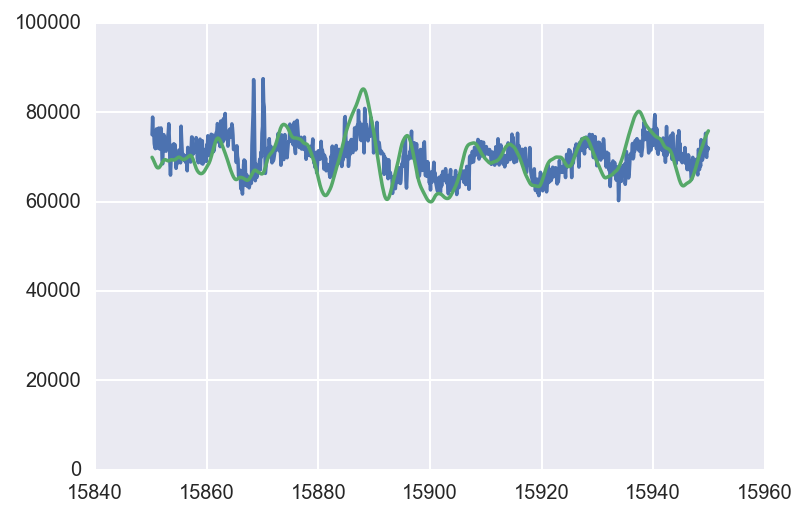

In [22]:
plt.plot(dat.wl, dat.data, label='Data')
plt.plot(dat.wl, dat.model_composite, label='Model')
plt.ylim(0, 100000)

I settled on $\log{\Omega}=1.17$.  See caveats in previous notebooks about trying to interpret $\Omega$.

What about the strength of the GP correlation scale?

In [26]:
from scipy.stats import multivariate_normal

In [27]:
CC = np.load('../sf/2M0136/m113/output/marley_grid/run01/CC_new.npy')

In [28]:
nz_draw = multivariate_normal(dat.model_composite, CC)

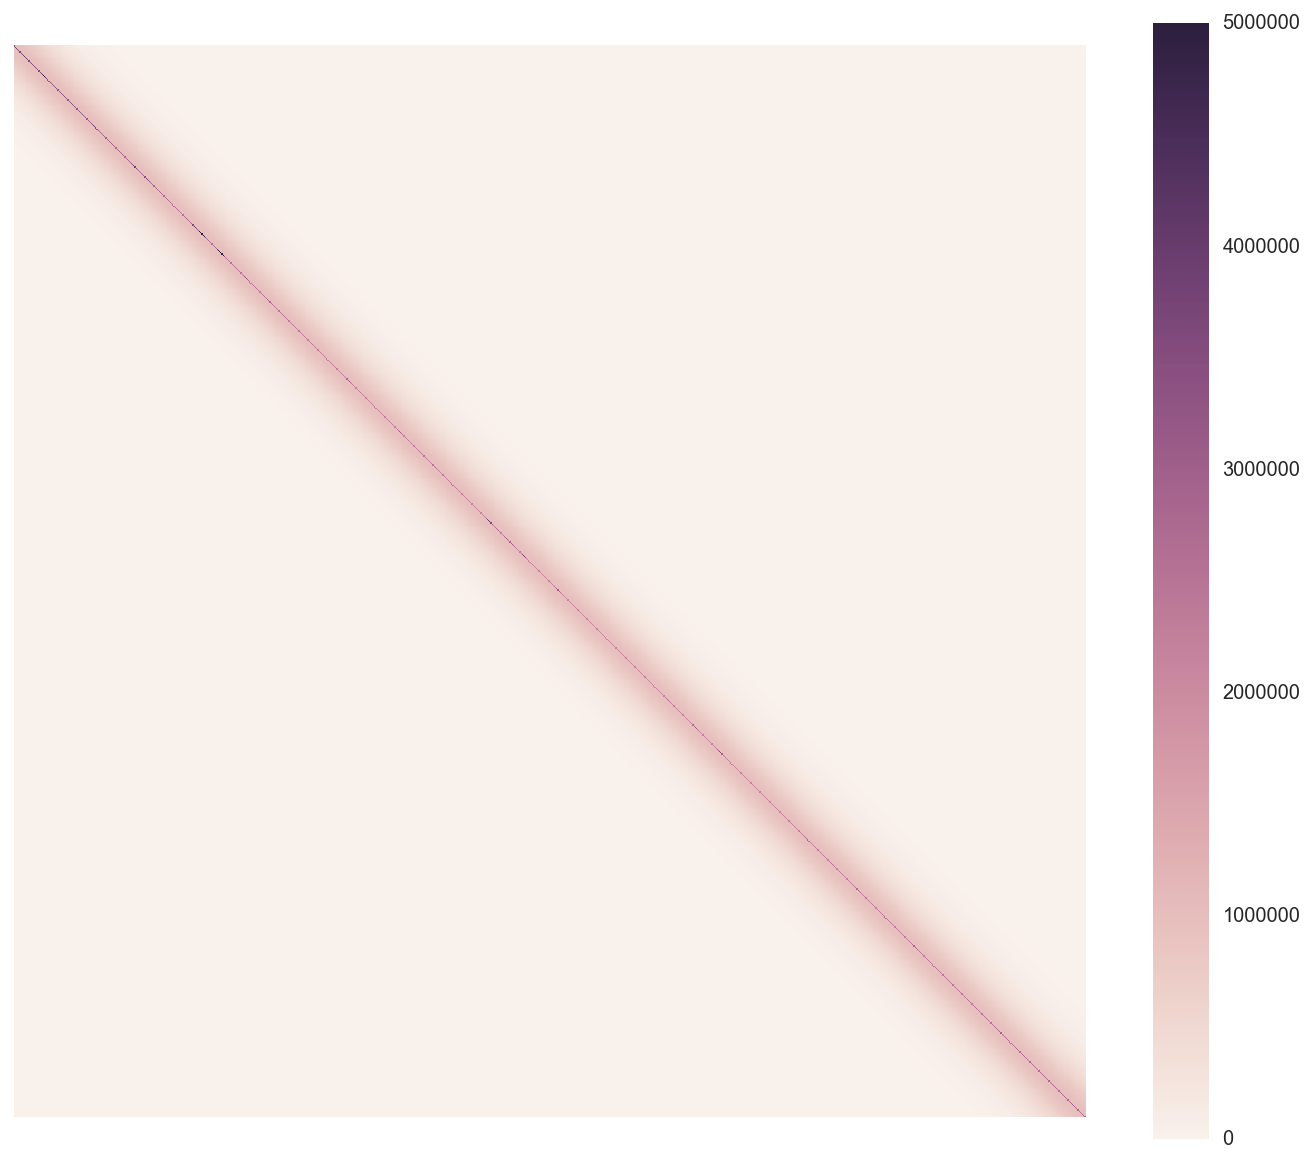

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(CC, xticklabels=False, yticklabels=False, vmax=5.0e6, square=True)

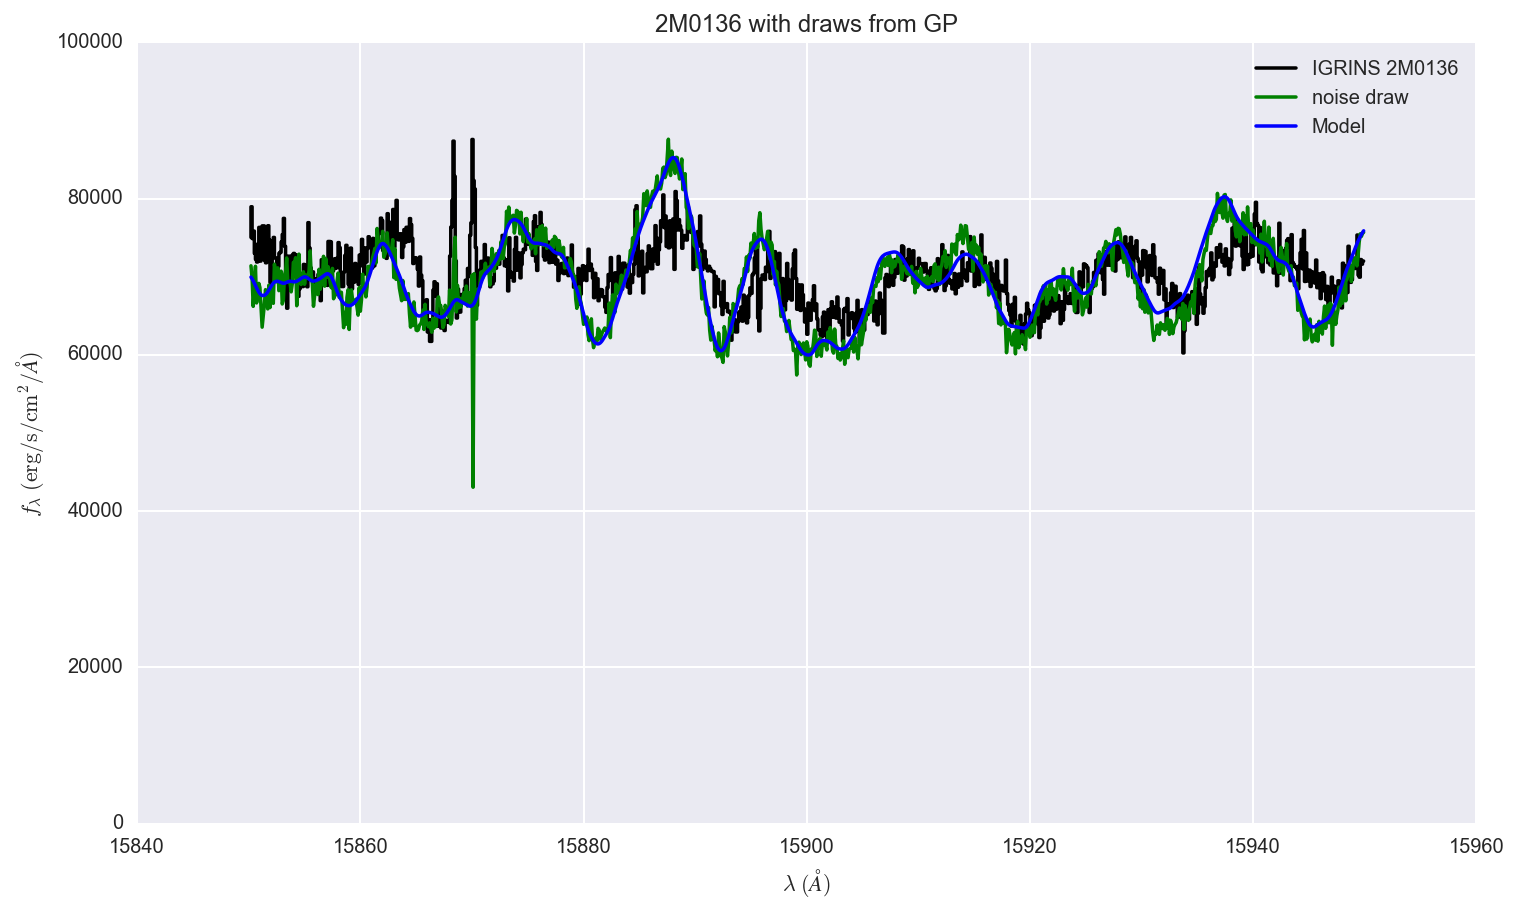

In [31]:
plt.figure(figsize=(12, 7))
plt.step(dat.wl, dat.data, 'k', label='IGRINS 2M0136')


plt.plot(dat.wl, nz_draw.rvs(), 'g-', label='noise draw')
#for i in range(10):
#    plt.plot(dat.wl, nz_draw.rvs(), 'g-', alpha=0.3)

plt.plot(dat.wl, dat.model_composite, 'b-', label='Model')

plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M0136 with draws from GP')
plt.legend(loc='best')
plt.ylim(0, 100000)
plt.yscale('linear')

Looks like we want GP values in the vicinity:

```json
  "l": 60.0,
  "logAmp": 3.0,
```

Ok, this will be our initial stellar parameter guess:

```yaml
grid: [1300.0, 4.5]
logOmega: 1.17
vsini: 45.0
vz: 0.0
```

### The end.